In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import display



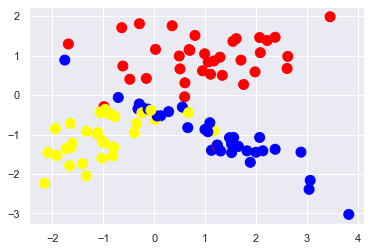

In [2]:
from sklearn import datasets

X, y = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
plt.scatter( X[:,0], X[:,1], c=y, cmap=colors, s=100);

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [4]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [6]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (10, 5))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = light_colors)
   
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Train data, accuracy={:.2f}'.format(estimator.score(train_data,train_labels)))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)

    plt.contourf(xx, yy, Z, cmap = light_colors)

    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Test data, accuracy={:.2f}'.format(estimator.score(test_data,test_labels)))
    plt.show()
    return

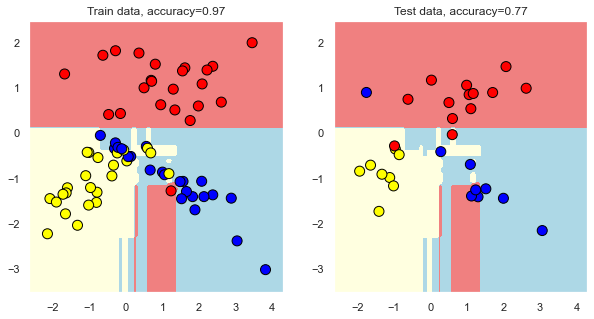

In [7]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=5, random_state=2)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

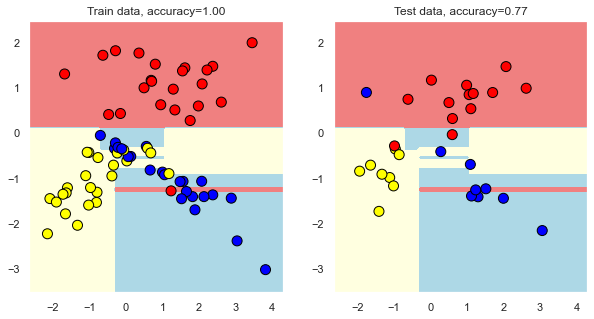

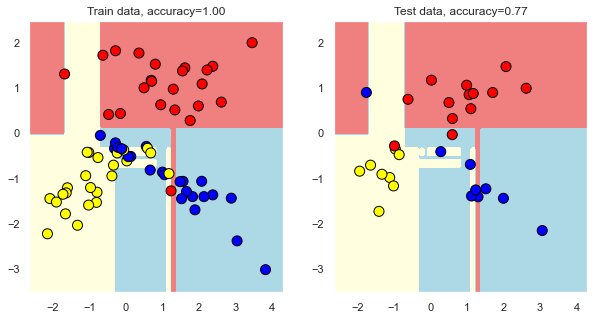

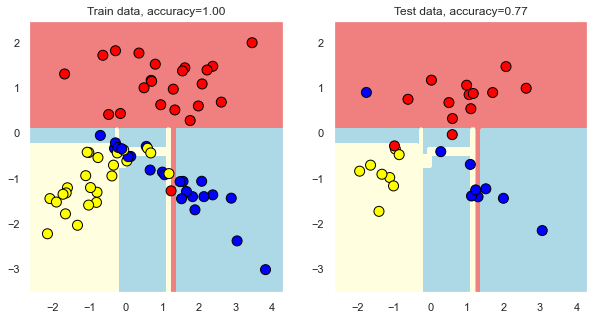

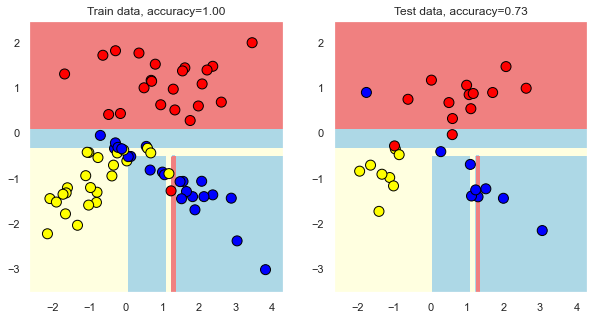

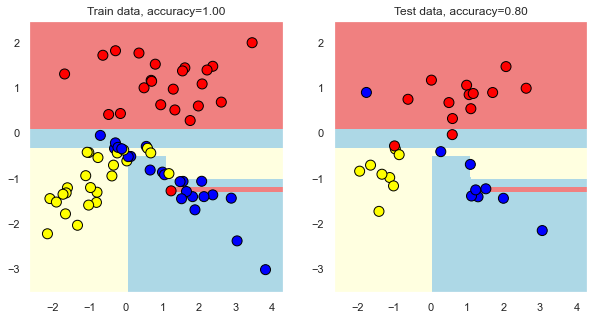

In [8]:
for i in range( len(estimator.estimators_) ):
    plot_decision_surface(estimator.estimators_[i], X_train, y_train, X_test, y_test, colors, light_colors)


In [9]:
estimator.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

In [10]:
rf_1= RandomForestClassifier(n_estimators=5, random_state=42)
rf_1.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_1.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_1.score(X_test, y_test)))
# мало деревьев в лесу

Правильность на обучающем наборе: 0.971
Правильность на тестовом наборе: 0.833


In [11]:
rf_2= RandomForestClassifier(n_estimators=500, max_features='sqrt',  random_state=42)
rf_2.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_2.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_2.score(X_test, y_test)))
# на тесте переобучились, но неплохо осреднились за счет семплирования

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.833


In [12]:
rf_3= RandomForestClassifier(n_estimators=500, min_samples_leaf = 5, max_features=None,  random_state=42)
rf_3.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_3.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_3.score(X_test, y_test)))
# на тесте остановильсь принудительно по глубине и неплохо осреднились, фичи не семплировали - их очень мало!

Правильность на обучающем наборе: 0.914
Правильность на тестовом наборе: 0.900


In [13]:
rf_4= RandomForestClassifier(n_estimators=500, max_features='sqrt', min_samples_leaf = 5,  random_state=42)
rf_4.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_4.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_4.score(X_test, y_test)))
# на тесте остановильсь вовремя и неплохо осреднились, но сэмплирование фич тут лишнее, фич мало...

Правильность на обучающем наборе: 0.914
Правильность на тестовом наборе: 0.900


In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=10, random_state=0) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.951


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=1000, max_features='sqrt', min_samples_leaf = 5, random_state=0) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.981
Правильность на тестовом наборе: 0.972


In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=1000, max_features=10, random_state=0) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


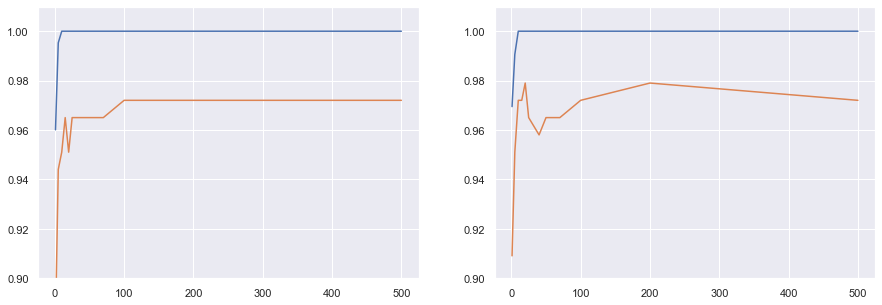

In [23]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)    
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.9, 1.01)
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.9, 1.01);

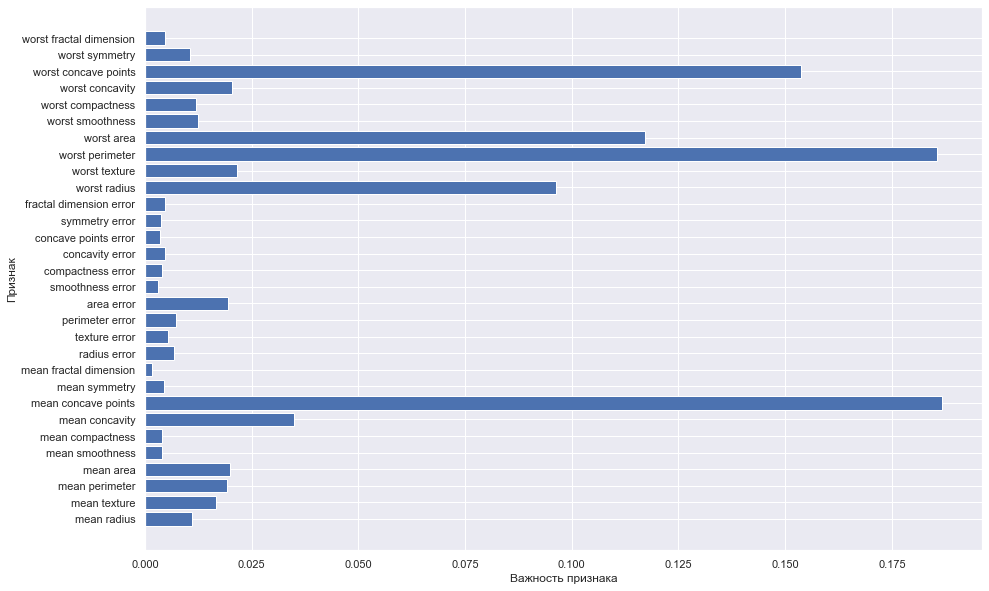

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plt.figure(figsize = (15, 10))
plot_feature_importances_cancer(forest)